In [6]:
import netCDF4
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
import os
import glob
import pandas
import re
from scipy.interpolate import griddata

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 20})

In [7]:
data_path = "/path/netcdf/"
fname = "20200515.ssp585.TEST_SSP585_DEBUG.ne30_oECv3_ICG.grizzly.cam.h2.2015-01-01-00000.nc"

In [8]:
def print_data_info(data):
    # Print some data info
    ###############################
    print (data.variables.keys())
    print (data)
    for d in data.dimensions.items():
        print (d)

    ## http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html
    print (data.data_model)

    nc_attrs = data.ncattrs()
    for nc_attr in nc_attrs:
        print ('\t%s:' % nc_attr, repr(data.getncattr(nc_attr)))

    print ("NetCDF dimension information:")
    nc_dims = [dim for dim in data.dimensions]  # list of nc dimensions
    for dim in nc_dims:
        print ("\tName:", dim)
        print ("\t\tsize:", len(data.dimensions[dim]))

    nc_vars = [var for var in data.variables]  # list of nc variables

    print ("NetCDF variable information:")
    for var in nc_vars:
        if var not in nc_dims:
            print ('\tName:', var)
            print ("\t\tdimensions:", data.variables[var].dimensions)
            print ("\t\tsize:", data.variables[var].size)

            
def load_data(filename):
    data = Dataset(filename)
    return data

In [9]:
## Load data
data = load_data(data_path+fname)
#print_data_info(data)
tsteps_per_month = len(data.variables['time'][:])
var_name = 'T001'

tstep = 100
lon_array = np.asarray(data.variables['lon'][:])
lat_array = np.asarray(data.variables['lat'][:])
uvel = np.asarray(data.variables[var_name][:])
uvel = np.asarray(uvel[tstep,:])

print (np.min(lon_array),np.max(lon_array))
print (np.min(lat_array),np.max(lat_array))

0.0 360.0
-90.0 90.0


48602


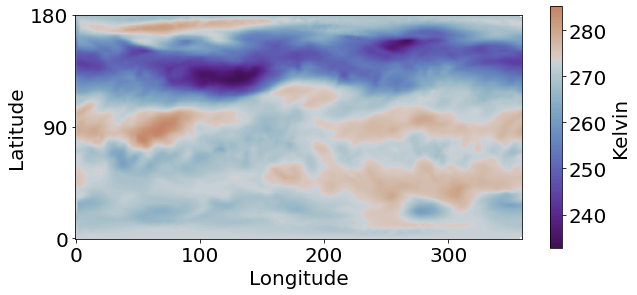

In [10]:
import matplotlib.colors as matcolors
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from matplotlib.patches import Rectangle

top = plt.get_cmap('twilight_shifted', 256)
top_cmp = matcolors.ListedColormap(top(np.linspace(0.55, 1, 256)))
bottom = cm.get_cmap('twilight_shifted', 256)
bottom_cmp = matcolors.ListedColormap(bottom(np.linspace(0.05,0.45,256)))

white = np.array(([256/256, 256/256, 256/256, 1]))

newcolors = np.vstack((bottom_cmp(np.linspace(0, 1, 256)),
                       top_cmp(np.linspace(0, 1, 256))))
newcmp = matcolors.ListedColormap(newcolors, name='OrangeBlue')
newcmp2 = matcolors.ListedColormap(newcmp(np.linspace(0.0, 0.64, 512)))


## Render using python grid data
lon_dim = 360
lat_dim = 180

points =  np.column_stack((lon_array, lat_array))
## create 2D regular grid
grid_x, grid_y = np.mgrid[0:360:360j, -89:89:180j] ## grid for whole world
cur_loc = np.zeros((lat_dim*lon_dim,2),dtype='float')

ind = 0
for j in range(lat_dim):
    for i in range(lon_dim):
        cur_loc[ind,:] = np.array([grid_x[i][j],grid_y[i][j]])
        ind = ind+1

print(len(points))
        
grid_z0 = griddata(points, uvel, cur_loc, method='linear')
grid_z0_2d = grid_z0.reshape((lat_dim,lon_dim))
plt.imshow(grid_z0_2d, origin='lower',cmap=plt.get_cmap(newcmp2))
plt.colorbar(orientation="vertical", shrink=0.74, label="Kelvin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(np.arange(0, 190, 90))

plt.savefig('out.png')